# Task 1 : Prediction using supervised Machine Learning


Done By: Ashi Shukla

Step 1: Importing all the necessary libraries and data from your data source(mine is stored in my computer in my downloads section)

In [14]:
#Importing all the libraries required

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#importing the dataset
data = pd.read_csv(r"C://Users//SATYAM//Downloads//task1.csv")

Step 2 : Studying the dataset

In [16]:
#Gives first five observations
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [17]:
#Gives last five observations
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [18]:
#Gives the count, mean, median ,quartile, minimum and maximum values
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [19]:
#Gives the number of rows and column of the data
data.shape

(25, 2)

Here the number of rows in the data are 25 and the number of columns are 2.

In [20]:
#Gives the number of null and non- null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [21]:
#This shows that there are zero null values.

In [22]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Visualisation of the Data

Step 3: Visualization of the data

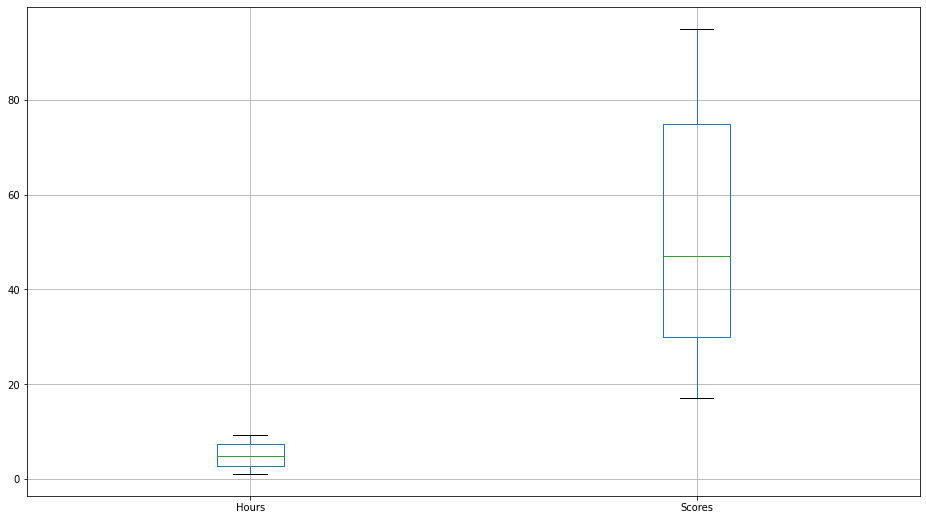

In [23]:
data.boxplot()

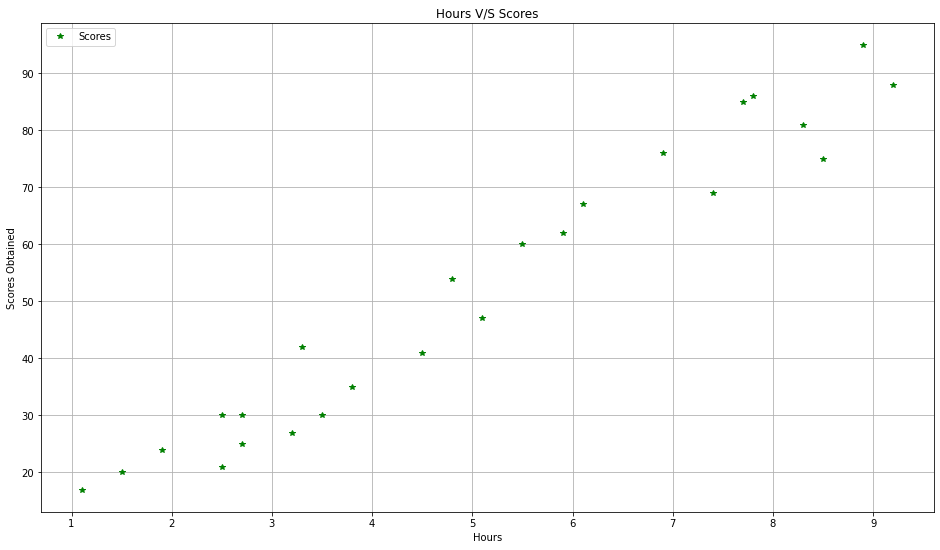

In [24]:
plt.rcParams["figure.figsize"]= [16,9]
data.plot(x = "Hours",y = "Scores",style ="*",color = "green")
plt.title("Hours V/S Scores")
plt.xlabel("Hours")
plt.ylabel("Scores Obtained")
plt.grid()
plt.show()

From the figure above we can infer than there is a linear relationship between hours studied and scores obtained.

In [25]:
#Find the correlation coefficient
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


We find that correlation between Hours studied and Scored Obtained is 0.9761, which shows a high positive linear relationship between the two variables.

Step 4: Take hours studied as the independednt variable and Sores obtained as the dependent variable.

In [26]:
x= data.iloc[:,:1]
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [27]:
y= data.iloc[:,1:]
y

,Scores
0,21
1,47
2,27
3,75
4,30
5,20
6,88
7,60
8,81
9,25


Step 5: Splitting the data into test and train from which train will be used to train the model and test will be used to test the efficiency of the model.

In [28]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

Since the figure above shows a linear relationship we import Linear Regression model from sklearn and fit the train variable into the model to train the model

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [30]:
#Coefficient of the model 
model.coef_

array([[9.91065648]])

In [31]:
#Intercept of the model
model.intercept_

array([2.01816004])

In [32]:
line = model.coef_*x+ model.intercept_
line

,Hours
0,26.794801
1,52.562508
2,33.732261
3,86.258740
4,36.705458
5,16.884145
6,93.196200
7,56.526771
8,84.276609
9,28.776933


# Fitting the line of Regression on the data
 

Text(0, 0.5, 'Scores Obtained')

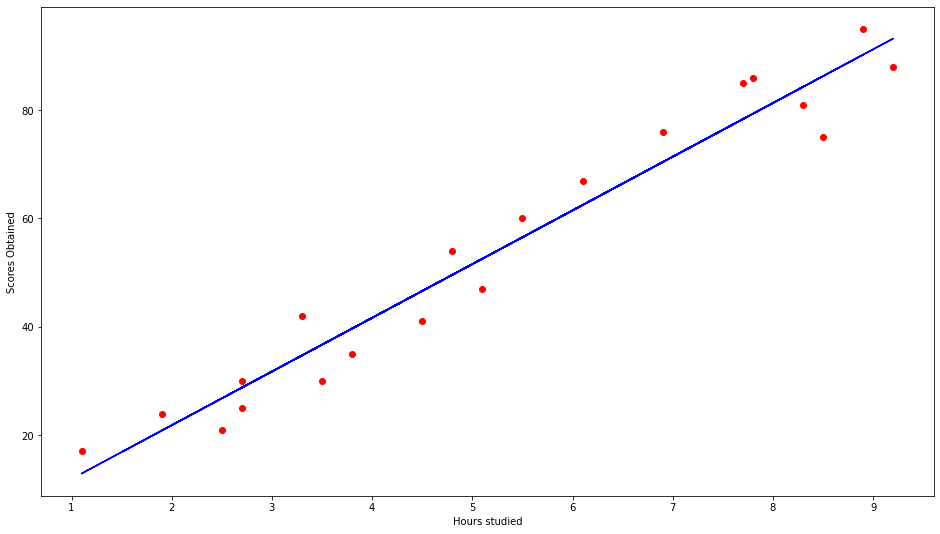

In [33]:
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(x_train,y_train,color='red')

plt.plot(x ,line, color ='blue')
plt.xlabel("Hours studied")
plt.ylabel("Scores Obtained")

Here the blue line shows the line from Regression analysis and the other points shows the train dataset.

In [25]:
x_test

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [26]:
y_test

,Scores
5,20
2,27
19,69
16,30
11,62


Step 6: To check how the line fits in the test data

Text(0, 0.5, 'Scores Obtained')

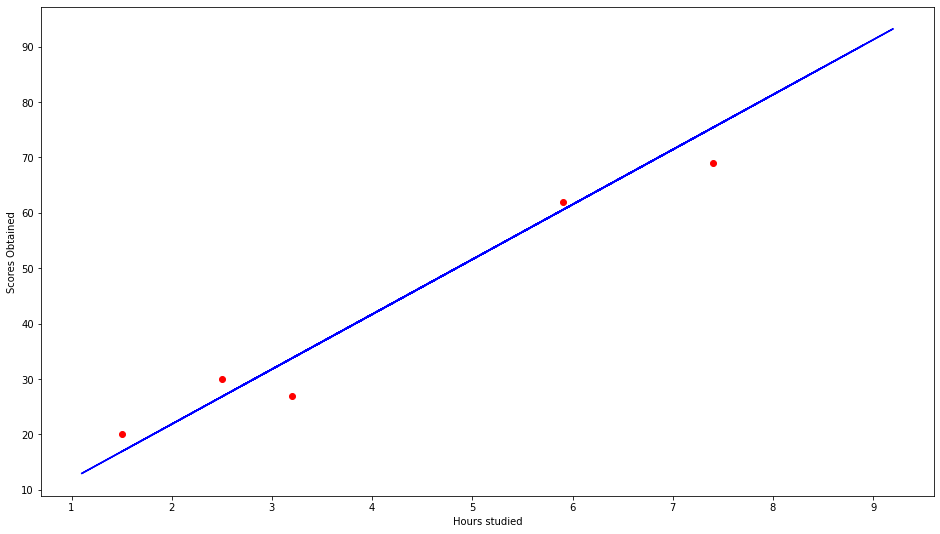

In [27]:
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(x_test,y_test,color='red')

plt.plot(x , line, color ='blue')
plt.xlabel("Hours studied")
plt.ylabel("Scores Obtained")

The figure above tells us the line more or less overlaps the points of the test data set. It tells us the predicted value.

In [30]:
y_predict= model.predict(x_test)
y_predict

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [31]:
y_test

,Scores
5,20
2,27
19,69
16,30
11,62


Comparing the actual and the predicted values

In [33]:
comparing= pd.DataFrame({'Actual':[y_test], 'Predicted' : [y_predict]})

In [34]:
comparing

,Actual,Predicted
0,Scores 5 20 2 27 19 69 16...,"[[16.884144762398048], [33.73226077948985], [7..."


## What is the predicted value to marks obtained if a student studies for 9.25 hours?

In [35]:
hours = 9.25
prediction = model.predict([[hours]])

In [36]:
prediction

array([[93.69173249]])

The predicted value according to the Linear Regreesion model is 93.69 marks.






In [9]:
#Mean squared error and the value of r square

In [37]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test,y_predict)

In [38]:
from sklearn.metrics import r2_score

In [39]:
r_square = metrics.r2_score(y_test,y_predict)
r_square

0.9454906892105355

In [40]:
MAE

4.183859899002975

The value of R square for this Linear Regression model is 0.9549.